In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('./heights_weights_genders.csv')

df['Weight'] = df['Weight'] / 2.2046
df['Weight'] = df['Weight'].astype(int)

df['Height'] = df['Height'] * 2.54
df['Height'] = df['Height'].astype(int)

df.head()

,Gender,Height,Weight
0,Male,187,109
1,Male,174,73
2,Male,188,96
3,Male,182,99
4,Male,177,93


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.0000
mean,168.073300,72.7347
std,9.775269,14.5725
min,137.000000,29.0000
25%,161.000000,61.0000
50%,168.000000,73.0000
75%,175.000000,84.0000
max,200.000000,122.0000


<AxesSubplot:xlabel='Height', ylabel='Weight'>

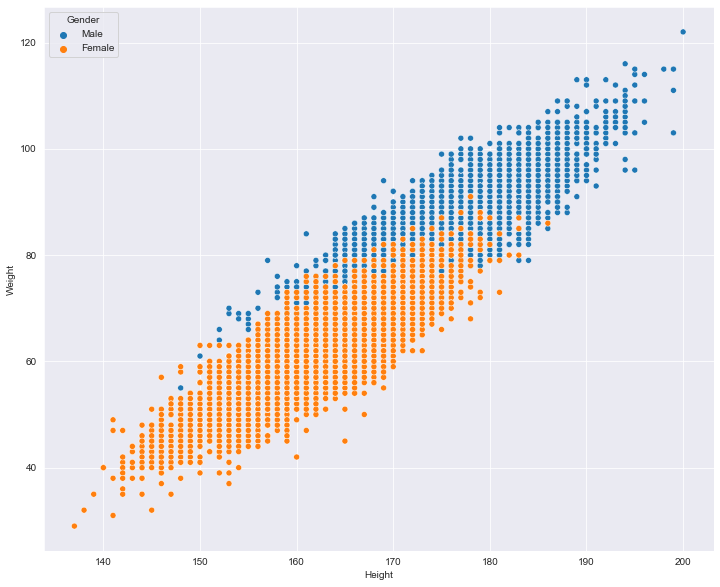

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, y='Weight', x='Height', hue='Gender', ax=ax)

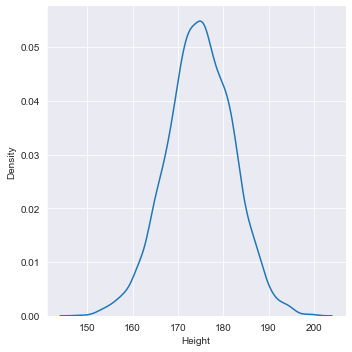

In [7]:
dfMale = df[df['Gender'] == 'Male']
# fig, ax = plt.subplots(figsize=(12, 10))
sns.displot(data=dfMale, x='Height', kind='kde')

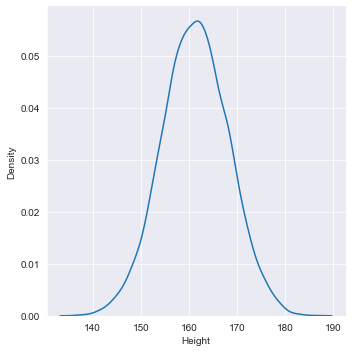

In [8]:
dfFemale = df[df['Gender'] == 'Female']
# fig, ax = plt.subplots(figsize=(12, 10))
sns.displot(data=dfFemale, x='Height', kind='kde')

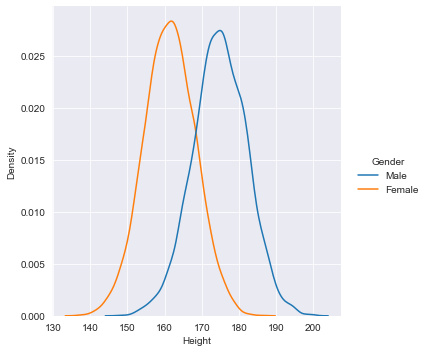

In [9]:
sns.displot(data=df, x='Height', kind='kde', hue='Gender')

In [10]:
df['Gender'] = df['Gender'].replace('Male', 0) 
df['Gender'] = df['Gender'].replace('Female', 1)
df.head(200)

,Gender,Height,Weight
0,0,187,109
1,0,174,73
2,0,188,96
3,0,182,99
4,0,177,93
...,...,...,...
195,0,183,94
196,0,170,82
197,0,192,105
198,0,168,77


In [27]:
X = df[['Gender', 'Height']]
Y = df[['Weight']]

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
predictions = model.predict(X_test)

C:\Users\Nicolas\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Test - Prediction', ylabel='Density'>

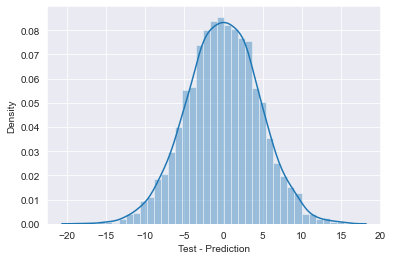

In [37]:
sns.distplot(y_test - predictions, axlabel="Test - Prediction")

In [25]:
from sklearn.preprocessing import StandardScaler

myvals = np.array([0,176]).reshape(1, -1)

scaler = StandardScaler().fit(myvals)
myvals = scaler.transform(myvals)
print(myvals)

[[0. 0.]]


In [26]:
# 94 -> 94 Kg (Weight)
# 182 -> 182 cm (Height) 

print(model.predict(myvals)) 

# The more close to 0, the more is a Male
# The more close to 1, the more is a Female

[[72.73333562]]
